In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('IRIS.csv')

In [24]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [25]:
df.tail()

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [26]:
df.shape

(150, 5)

## Species Distribution

In [27]:
print(df.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Iris Visualization
- Univariant Plots
- Bivariant Plots

### Univariant Pots

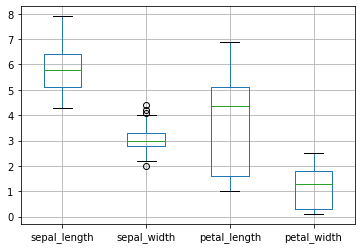

In [31]:
df.boxplot()
plt.show()

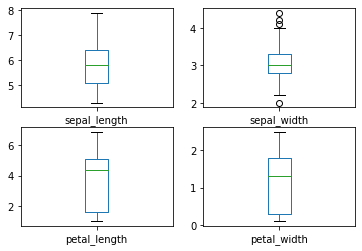

In [29]:
df.plot(kind = 'box', subplots = 'True',layout = (2,2))
plt.show()

### Bivariant Plots

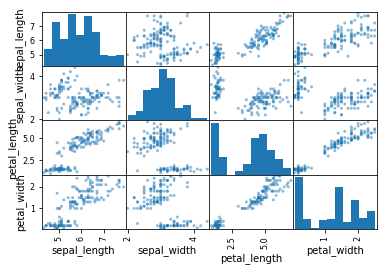

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [35]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [38]:
print(prediction)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [39]:
model.predict([[6.1, 2.8, 4.7, 1.2]])

array(['Iris-versicolor'], dtype=object)

In [40]:
from sklearn.metrics import accuracy_score

In [42]:
acc = accuracy_score(y_test,prediction)

In [43]:
print(acc)

1.0


# Naive Bayes Model
**Formula**

                 ( P(data|class) * P(class) ) 
- P( class|data )  =  ---------------------------------------------<br>
                      P(data)

## Dataset contains only one input feature
<img src = 'weather.png'>

### Calculate Probability of Paying
- p(Play=Yes | Overcast) = ( P(Overcast | Yes) * P(Yes) ) / P (Overcast) ====> Eq (1)

    1. Calculate Prior Probabilities
        - P(Overcast) = 4/14 = 0.29
    2. Calculate Posterior Probabilities
        - P(Yes)= 9/14 = 0.64
    3. Put Prior and Posterior probabilities in Eq (1)
        - P (Yes | Overcast) = 0.44 * 0.64 / 0.29 = 0.98(Higher)

### Probability of not playing
- P(No | Overcast) = P(Overcast | No) P(No) / P (Overcast) ====> Eq (2)

    1. Calculate Prior Probabilities:
        - P(Overcast) = 4/14 = 0.29
        - P(No)= 5/14 = 0.36
    2. Calculate Posterior Probabilities:
        - P(Overcast |No) = 0/9 = 0
    3. Put Prior and Posterior probabilities in Eq (2)
        - P (No | Overcast) = 0 * 0.36 / 0.29 = 0

## Dataset contains more than two (multiple) features
<img src = 'Weather2.PNG'>

## Probability of playing
- P(Play= Yes | Overcast, Temp=Mild) = P(Overcast, Mild | Yes) * P(Yes) ====> Eq (1)
- P(Overcast, Temp=Mild | Play= Yes)= P(Overcast |Yes) P(Mild |Yes) ====> Eq (2)

    1. Calculate Prior Probabilities
        - P(Yes)= 9/14 = 0.64
    2. Calculate Posterior Probabilities
        - P(Overcast |Yes) = 4/9 = 0.44 P(Mild |Yes) = 4/9 = 0.44
    3. Put Posterior probabilities in Eq (2) 
        - P(Overcast, Mild | Yes) = 0.44 * 0.44 = 0.1936(Higher)
    4. Put Prior and Posterior probabilities in Eq (1)
        - P(Yes | Overcast, Mild) = 0.1936 * 0.64 = 0.124

## Probability of not playing
- P(Play= No | Overcast, Mild) = P(Overcast, Mild | No) * P(No) ====> Eq (3)
- P(Overcast, Mild | Play= No) = P(Overcast | No) * P(Mild | No) ====> Eq (4)

    1. Calculate Prior Probabilities
        - P(Play=No)= 5/14 = 0.36
    2. Calculate Posterior Probabilities
        - P(Overcast |Play=No) = 0/9 = 0 P(Mild | Play=No) = 2/5 = 0.4
    3. Put posterior probabilities in Eq (4)
        - P(Overcast, Temp=Mild | No) = 0 * 0.4 = 0
    4. Put prior and posterior probabilities in Eq (3) 
        - P(Play= No | Overcast, Temp=Mild) = 0 * 0.36 = 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('PlayTennis.csv')

In [5]:
df.head(3)

Outlook Temperature Humidity    Wind Play Tennis
0     Sunny         Hot     High    Weak          No
1     Sunny         Hot     High  Strong          No
2  Overcast         Hot     High    Weak         Yes

In [4]:
df.shape

(14, 5)

## Encoding Feature
- You need to convert these string labels into numbers
    - Eg: 'Overcast','Rainy','Sunny' as 0,1,2
- Scikit-Learn provides " **LabelEncoder** " library for encoding labels values between 0 and one less than the no of discrete classes

In [6]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Temperature'] = le.fit_transform(df['Temperature'])
df['Humidity'] = le.fit_transform(df['Humidity'])
df['Wind'] = le.fit_transform(df['Wind'])
df['Play Tennis'] = le.fit_transform(df['Play Tennis'])

In [9]:
df

Outlook  Temperature  Humidity  Wind  Play Tennis
0         2            1         0     1            0
1         2            1         0     0            0
2         0            1         0     1            1
3         1            2         0     1            1
4         1            0         1     1            1
5         1            0         1     0            0
6         0            0         1     0            1
7         2            2         0     1            0
8         2            0         1     1            1
9         1            2         1     1            1
10        2            2         1     0            1
11        0            2         0     0            1
12        0            1         1     1            1
13        1            2         0     0            0

In [10]:
X = df[['Outlook','Temperature','Humidity','Wind']]
Y = df[['Play Tennis']]

## Apply Naive Bayes Model

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
gNB = GaussianNB()
gNB.fit(X,Y)
y_pred = gNB.predict(X)

C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [16]:
gNB.predict([[0,0,1,0]])

array([1])

## Check Accuracy

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy = accuracy_score(Y,y_pred)

In [20]:
print(accuracy)

0.9285714285714286
